monomial interpolation

In [ ]:
import numpy as np
A =np.array([[1,-1,1], [1,1,1], [1,2,4]])
A

array([[ 1, -1,  1],
       [ 1,  1,  1],
       [ 1,  2,  4]])

In [ ]:
y = np.array([-6, 0, 6])
y

array([-6,  0,  6])

In [ ]:
np.linalg.solve(A, y)

array([-4.,  3.,  1.])

lagrange form

Lagrange Polynomial Coefficients (c2, c1, c0): [ 1.  3. -4.]
Verification of P(x) at data points: [-6.  0.  6.]
Simplified Lagrange Polynomial Result:
P(x) = -4 + 3x + 1x^2


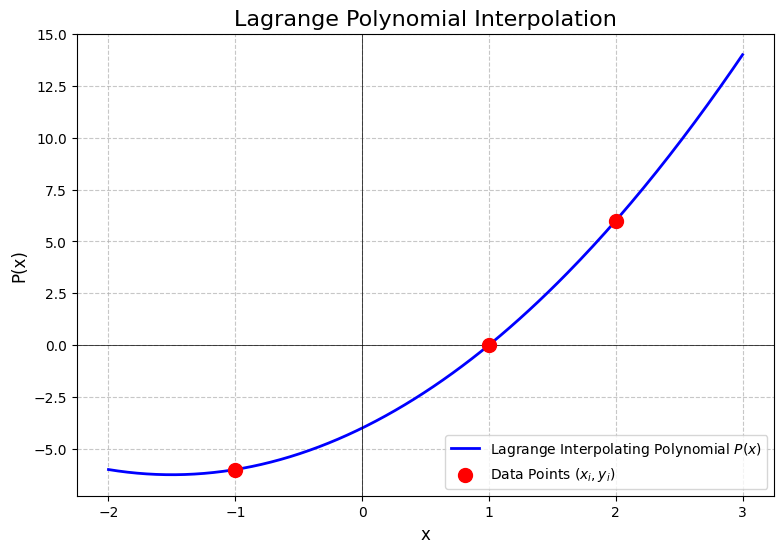

In [ ]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

# data points
x = np.array([-1., 1., 2.])
y = np.array([-6., 0., 6.])

# Construct the Lagrange Polynomial
P_lagrange = lagrange(x, y)

c = P_lagrange.coefficients
print(f"Lagrange Polynomial Coefficients (c2, c1, c0): {c}")
print(f"Verification of P(x) at data points: {P_lagrange(x)}")

print(f"Simplified Lagrange Polynomial Result:")
print(f"P(x) = {c[2]:.0f} + {c[1]:.0f}x + {c[0]:.0f}x^2")

# plot
plt.figure(figsize=(9, 6)) # Set the figure size
x_plot = np.linspace(np.min(x) - 1, np.max(x) + 1, 200)
y_plot = P_lagrange(x_plot)

# Plot the interpolating polynomial
plt.plot(x_plot, y_plot, label='Lagrange Interpolating Polynomial $P(x)$', color='blue', linewidth=2)

# Plot the original data points
plt.scatter(x, y, color='red', marker='o', s=100, zorder=5, label='Data Points $(x_i, y_i)$')

plt.title('Lagrange Polynomial Interpolation', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('P(x)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(fontsize=10)
plt.show()

newton interplation

In [ ]:
import numpy as np
np.flip(np.arange(2,6))

array([5, 4, 3, 2])

In [ ]:
def diff(x, y):
    m = x.size
    a = np.zeros(m)
    for i in range(m):
        a[i] = y[i]
    for j in range(1, m):
        for i in np.flip(np.arange(j,m)):
            a[i] = (a[i]-a[i-1]) / (x[i]-x[i-(j)])
    return a

In [ ]:
diff(np.array([-1,1,2]), np.array([-6,0,6]))

array([-6.,  3.,  1.])

In [ ]:
diff(np.array([1.765,1.760,1.755,1.750]),
 np.array([0.92256,0.92137,0.92021,0.91906]))

array([ 0.92256   ,  0.238     ,  0.6       , 26.66666667])

In [ ]:
def newton(x, y, z):
    m = x.size # here m is the number of data points, not the degree
    # of the polynomial
    a = diff(x, y)
    sum = a[0]
    pr = 1.0
    for j in range(m-1):
        pr *= (z-x[j])
        sum += a[j+1]*pr
    return sum

In [ ]:
newton(np.array([1.765,1.760,1.755,1.750]),
 np.array([0.92256,0.92137,0.92021,0.91906]), 1.761)

np.float64(0.92160496)

High degree polynomial interpolation

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

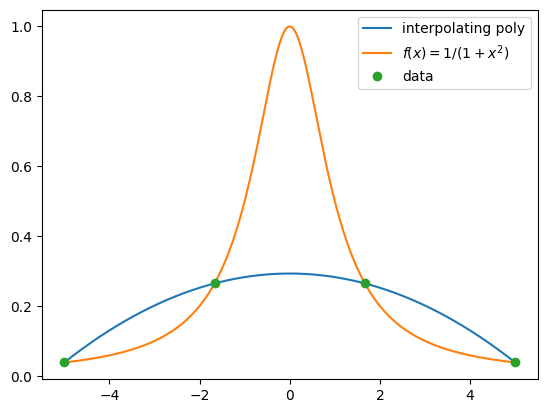

In [ ]:
f = lambda x: 1/(1+x**2)
xi = np.linspace(-5, 5, 4) # x-coordinates of the data, 4 points equally spaced from
#-5 to 5 in increments of 10/3
yi = f(xi) # the corresponding y-coordinates
xaxis = np.linspace(-5, 5, 1000)
runge = f(xaxis) # Runge's function values
interp = newton(xi, yi, xaxis)
plt.plot(xaxis, interp, label='interpolating poly')
plt.plot(xaxis, runge, label="$f(x)=1/(1+x^2)$")
plt.plot(xi, yi, 'o', label='data')
plt.legend(loc='upper right');

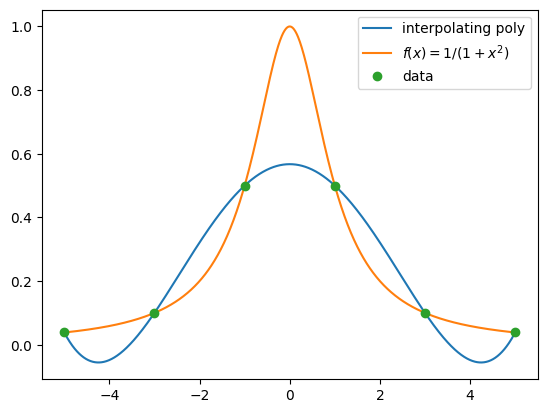

In [ ]:
 xi = np.linspace(-5, 5, 6) # 6 equally spaced values from-5 to 5
 yi = f(xi) # the corresponding y-coordinates
 interp = newton(xi, yi, xaxis)
 plt.plot(xaxis, interp, label='interpolating poly')
 plt.plot(xaxis, runge, label="$f(x)=1/(1+x^2)$")
 plt.plot(xi, yi, 'o', label='data')
 plt.legend(loc='upper right');

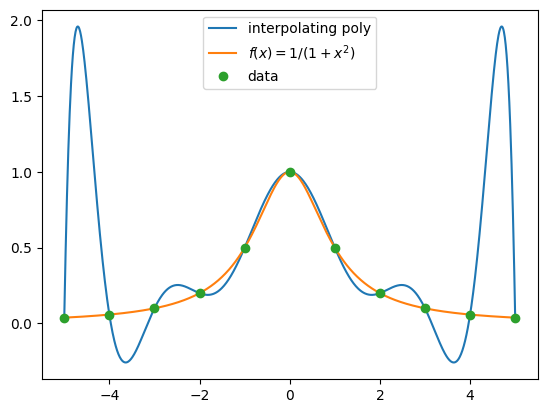

In [ ]:
 xi = np.linspace(-5, 5, 11) # 11 equally spaced values from-5 to 5
 yi = f(xi) # the corresponding y-coordinates
 interp = newton(xi, yi, xaxis)
 plt.plot(xaxis, interp, label='interpolating poly')
 plt.plot(xaxis, runge, label="$f(x)=1/(1+x^2)$")
 plt.plot(xi, yi, 'o', label='data')
 plt.legend(loc='upper center');

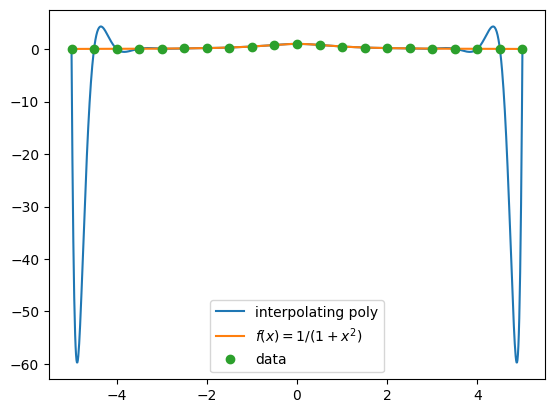

In [ ]:
 xi = np.linspace(-5, 5, 21) # 21 equally spaced values from-5 to 5
 yi = f(xi) # the corresponding y-coordinates
 interp = newton(xi, yi, xaxis)
 plt.plot(xaxis, interp, label='interpolating poly')
 plt.plot(xaxis, runge, label="$f(x)=1/(1+x^2)$")
 plt.plot(xi, yi, 'o', label='data')
 plt.legend(loc='lower center');

 Python code for computing Hermite interpolating polynomial

Hermite numerical code

In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt
 %matplotlib inline

In [ ]:
 def hdiff(x, y, yprime):
    m = x.size # here m is the number of data points. Note n=m-1
    # and 2n+1=2m-1
    l = 2*m
    z = np.zeros(l)
    a = np.zeros(l)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    for i in range(m):
        a[2*i] = y[i]
        a[2*i+1] = y[i]
    for i in np.flip(np.arange(1, m)): # computes the first divided
        # differences using derivatives
        a[2*i+1] = yprime[i]
        a[2*i] = (a[2*i]-a[2*i-1]) / (z[2*i]-z[2*i-1])
    a[1] = yprime[0]
    for j in range(2, l): # computes the rest of the divided differences
        for i in np.flip(np.arange(j, l)):
            a[i]=(a[i]-a[i-1]) / (z[i]-z[i-j])
    return a

In [ ]:
 def hermite(x, y, yprime, z):
    m = x.size # number of data points
    l = 2*m
    a = hdiff(x, y, yprime)
    z_nodes = np.zeros(l)
    for i in range(m):
        z_nodes[2*i] = x[i]
        z_nodes[2*i+1] = x[i]

    sum = a[0]
    pr = 1.0
    for j in range(l-1):
        pr *= (z - z_nodes[j])
        sum += a[j+1] * pr
    return sum

In [ ]:
 hdiff(np.array([-1.5, 1.6, 4.7]),
 np.array([0.071,-0.029,-0.012]),
 np.array([1,-1,1]))

array([ 0.071     ,  1.        , -0.33298647,  0.00671344,  0.0154761 ,
       -0.00519663])

In [ ]:
 def hermite(x, y, yprime, w):
    m = x.size # here m is the number of data points. not the
    # degree of the polynomial
    a = hdiff(x, y, yprime)
    z = np.zeros(2*m)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    sum = a[0]
    pr = 1.0
    for j in range(2*m-1):
        pr *= w-z[j]
        sum += a[j+1]*pr
    return sum

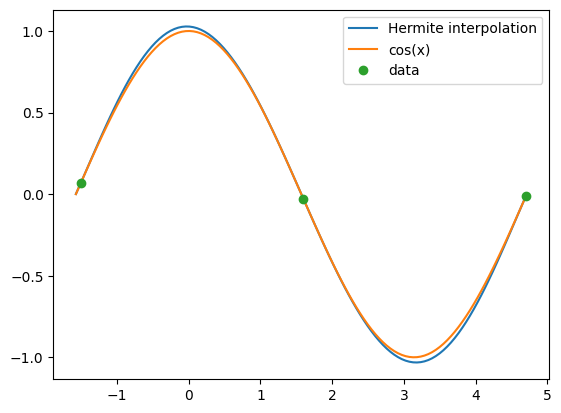

In [ ]:
 xaxis = np.linspace(-np.pi/2, 3*np.pi/2, 120)
 x = np.array([-1.5, 1.6, 4.7])
 y = np.array([0.071,-0.029,-0.012])
 yprime = np.array([1,-1, 1])
 funct = np.cos(xaxis)
 interp = hermite(x, y, yprime, xaxis)
 plt.plot(xaxis, interp, label='Hermite interpolation')
 plt.plot(xaxis, funct, label="cos(x)")
 plt.plot(x, y, 'o', label='data')
 plt.legend(loc='upper right');

Hermite instant code

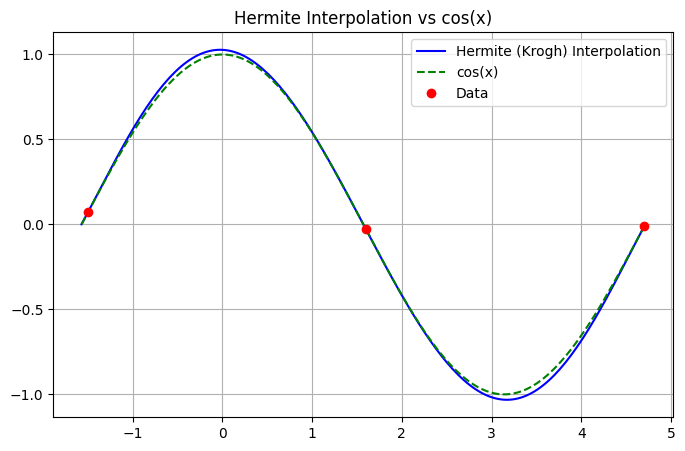

In [ ]:
 import numpy as np
 from scipy.interpolate import KroghInterpolator
 import matplotlib.pyplot as plt

# Titik data dan nilai fungsi
 x = np.array([-1.5, 1.6, 4.7])
 y = np.array([0.071, -0.029, -0.012])
 yprime = np.array([1, -1, 1])  # nilai turunan di tiap titik

# Susun data gabungan x dan y beserta turunannya
 x_all = np.repeat(x, 2)  # tiap titik diulang 2 kali
 y_all = np.ravel(np.column_stack([y, yprime]))

# Buat interpolator Hermite (KroghInterpolator)
 interp = KroghInterpolator(x_all, y_all)

# Evaluasi di titik-titik baru
 x_new = np.linspace(-np.pi/2, 3*np.pi/2, 200)
 y_new = interp(x_new)

# Fungsi asli untuk perbandingan (misalnya cos(x))
 funct = np.cos(x_new)

# Plot hasil interpolasi dan fungsi aslinya
 plt.figure(figsize=(8,5))
 plt.plot(x_new, y_new, 'b-', label='Hermite (Krogh) Interpolation')
 plt.plot(x_new, funct, 'g--', label='cos(x)')
 plt.plot(x, y, 'ro', label='Data')
 plt.title('Hermite Interpolation vs cos(x)')
 plt.legend()
 plt.grid(True)
 plt.show()

 Cubic spline interpolation

In [ ]:
 A =np.array([[1, 1, 0,0, 0, 0], [0, 0, 1,1,1, 1],
 [0, 0, 1, 2,4, 8], [1, 3, 0,-1,-2,-3],
 [0, 3, 0, 0,-1,-3], [0, 0, 0, 0, 1,6]])
 A

array([[ 1,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  1,  1],
       [ 0,  0,  1,  2,  4,  8],
       [ 1,  3,  0, -1, -2, -3],
       [ 0,  3,  0,  0, -1, -3],
       [ 0,  0,  0,  0,  1,  6]])

In [ ]:
 v =np.array([1, 1,0,0, 0, 0])
 v

array([1, 1, 0, 0, 0, 0])

In [ ]:
 np.linalg.solve(A,v)

array([ 1.5, -0.5, -1. ,  4.5, -3. ,  0.5])

Python code for spline interpolation

In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt
 %matplotlib inline

In [ ]:
 def CubicNatural(x, y):
    m = x.size # m is the number of data points
    n = m-1
    a = np.zeros(m)
    b = np.zeros(n)
    c = np.zeros(m)
    d = np.zeros(n)
    for i in range(m):
        a[i] = y[i]
    h = np.zeros(n)
    for i in range(n):
        h[i] = x[i+1]- x[i]
    u = np.zeros(n)
    u[0] = 0
    for i in range(1, n):
        u[i] = 3*(a[i+1]-a[i])/h[i]-3*(a[i]-a[i-1])/h[i-1]
    s = np.zeros(m)
    z = np.zeros(m)
    t = np.zeros(n)
    s[0] = 1
    z[0] = 0
    t[0] = 0
    for i in range(1, n):
        s[i] = 2*(x[i+1]-x[i-1])-h[i-1]*t[i-1]
        t[i] = h[i]/s[i]
        z[i]=(u[i]-h[i-1]*z[i-1])/s[i]
    s[m-1] = 1
    z[m-1] = 0
    c[m-1] = 0
    for i in np.flip(np.arange(n)):
        c[i] = z[i]-t[i]*c[i+1]
    b[i] = (a[i+1]-a[i])/h[i]-h[i]*(c[i+1]+2*c[i])/3
    d[i] = (c[i+1]-c[i])/(3*h[i])
    return a, b, c, d

In [ ]:
 def CubicNaturalEval(w, x, coeff):
    m = x.size
    if w<x[0] or w>x[m-1]:
        print('error: spline evaluated outside its domain')
        return
    n = m-1
    p = 0
    for i in range(n):
        if w <= x[i+1]:
            break
        else:
            p += 1
    # p is the number of the subinterval w falls into, i.e., p=i means
    # w falls into the ith subinterval $(x_i,x_{i+1}), and therefore
    # the value of the spline at w is
    # a_i+b_i*(w-x_i)+c_i*(w-x_i)^2+d_i*(w-x_i)^3.
    a = coeff[0]
    b = coeff[1]
    c = coeff[2]
    d = coeff[3]
    return a[p]+b[p]*(w-x[p])+c[p]*(w-x[p])**2+d[p]*(w-x[p])**3

In [ ]:
 def diff(x, y):
    m = x.size #here m is the number of data points.
    a = np.zeros(m)
    for i in range(m):
        a[i] = y[i]
    for j in range(1, m):
        for i in np.flip(np.arange(j,m)):
            a[i] = (a[i]-a[i-1]) / (x[i]-x[i-(j)])
    return a

In [ ]:
 def newton(x, y, z):
    m = x.size # here m is the number of data points, not the degree
    # of the polynomial
    a = diff(x, y)
    sum = a[0]
    pr = 1.0
    for j in range(m-1):
        pr *= (z-x[j])
        sum += a[j+1]*pr
    return sum

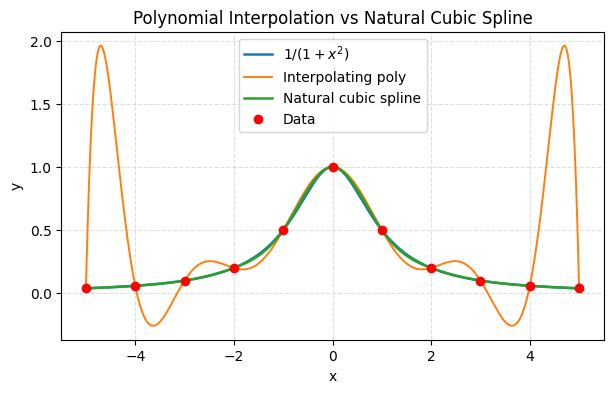

In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt
 from scipy.interpolate import CubicSpline
 f = lambda x: 1 / (1 + x**2)
 xaxis = np.linspace(-5, 5, 1000)
 runge = f(xaxis)
 xi = np.arange(-5, 6)
 yi = f(xi)
 cs = CubicSpline(xi, yi, bc_type='natural')
 naturalspline = cs(xaxis)

 def newton_poly(xi, yi, x):
    n = len(xi)
    a = np.copy(yi)
    for k in range(1, n):
        a[k:n] = (a[k:n] - a[k-1]) / (xi[k:n] - xi[k-1])
    p = a[-1]
    for k in range(n-2, -1, -1):
        p = a[k] + (x - xi[k]) * p
    return p

 interp = newton_poly(xi, yi, xaxis)

 plt.figure(figsize=(7, 4))
 plt.plot(xaxis, runge, label='$1/(1+x^2)$', linewidth=1.8)
 plt.plot(xaxis, interp, label='Interpolating poly', linewidth=1.4)
 plt.plot(xaxis, naturalspline, label='Natural cubic spline', linewidth=1.8)
 plt.plot(xi, yi, 'o', label='Data', color='red')
 plt.legend(loc='upper center')
 plt.grid(True, linestyle='--', alpha=0.4)
 plt.xlabel('x')
 plt.ylabel('y')
 plt.title('Polynomial Interpolation vs Natural Cubic Spline')
 plt.show()

In [ ]:
 def CubicClamped(x, y, yprime_left, yprime_right):
    m = x.size # m is the number of data points
    n = m-1
    A = np.zeros(m)
    B = np.zeros(n)
    C = np.zeros(m)
    D = np.zeros(n)
    for i in range(m):
        A[i] = y[i]
    h = np.zeros(n)
    for i in range(n):
        h[i] = x[i+1]- x[i]
    u = np.zeros(m)
    u[0] = 3*(A[1]-A[0])/h[0]-3*yprime_left
    u[m-1] = 3*yprime_right-3*(A[m-1]-A[m-2])/h[m-2]
    for i in range(1, n):
        u[i] = 3*(A[i+1]-A[i])/h[i]-3*(A[i]-A[i-1])/h[i-1]
    s = np.zeros(m)
    z = np.zeros(m)
    t = np.zeros(n)
    s[0] = 2*h[0]
    t[0] = 0.5
    z[0] = u[0]/s[0]
    for i in range(1, n):
        s[i] = 2*(x[i+1]-x[i-1])-h[i-1]*t[i-1]
        t[i] = h[i]/s[i]
        z[i] = (u[i]-h[i-1]*z[i-1])/s[i]
    s[m-1] = h[m-2]*(2-t[m-2])
    z[m-1] = (u[m-1]-h[m-2]*z[m-2])/s[m-1]
    C[m-1] = z[m-1]
    for i in np.flip(np.arange(n)):
        C[i] = z[i]-t[i]*C[i+1]
        B[i] = (A[i+1]-A[i])/h[i]-h[i]*(C[i+1]+2*C[i])/3
        D[i] = (C[i+1]-C[i])/(3*h[i])
    return A, B, C, D

In [ ]:
 def CubicClampedEval(w, x, coeff):
    m = x.size
    if w<x[0] or w>x[m-1]:
        print('error: spline evaluated outside its domain')
        return
    n = m-1
    p = 0
    for i in range(n):
        if w <= x[i+1]:
            break
        else:
            p += 1
    A = coeff[0]
    B = coeff[1]
    C = coeff[2]
    D = coeff[3]
    return A[p]+B[p]*(w-x[p])+C[p]*(w-x[p])**2+D[p]*(w-x[p])**3

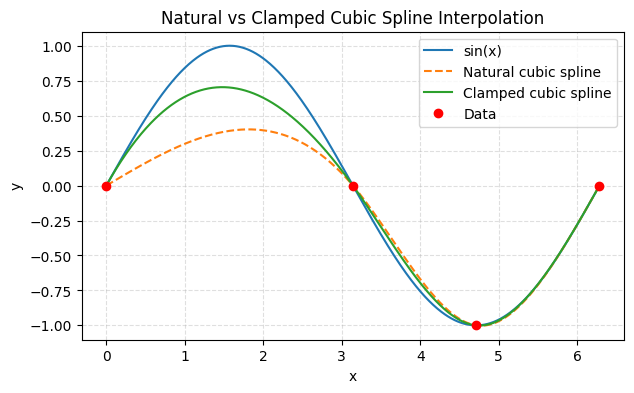

In [40]:
 import numpy as np
 import matplotlib.pyplot as plt
 from scipy.interpolate import CubicSpline

 f = lambda x: np.sin(x)
 xaxis = np.linspace(0, 2*np.pi, 600)
 funct = f(xaxis)
 xi = np.array([0, np.pi, 3*np.pi/2, 2*np.pi])
 yi = f(xi)
 natural_cs = CubicSpline(xi, yi, bc_type='natural')
 naturalspline = natural_cs(xaxis)
 clamped_cs = CubicSpline(xi, yi, bc_type=((1, 1), (1, 1)))
 clampedspline = clamped_cs(xaxis)

 plt.figure(figsize=(7, 4))
 plt.plot(xaxis, funct, label='sin(x)')
 plt.plot(xaxis, naturalspline, linestyle='--', label='Natural cubic spline')
 plt.plot(xaxis, clampedspline, label='Clamped cubic spline')
 plt.plot(xi, yi, 'o', label='Data', color='red')
 plt.legend(loc='upper right')
 plt.xlabel('x')
 plt.ylabel('y')
 plt.title('Natural vs Clamped Cubic Spline Interpolation')
 plt.grid(True, linestyle='--', alpha=0.4)
 plt.show()


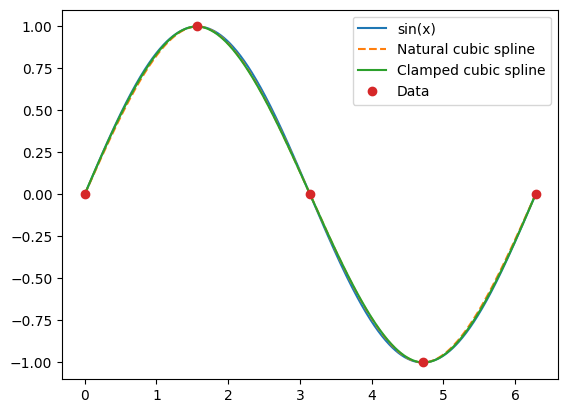

In [41]:
 import numpy as np
 import matplotlib.pyplot as plt
 from scipy.interpolate import CubicSpline

 xaxis = np.linspace(0, 2*np.pi, 600)
 f = lambda x: np.sin(x)
 funct = f(xaxis)

 xi = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
 yi = np.sin(xi)

# natural spline
 natural = CubicSpline(xi, yi, bc_type='natural')

# clamped cubic spline
 clamped = CubicSpline(xi, yi, bc_type=((1,1), (1,1)))

 plt.plot(xaxis, funct, label='sin(x)')
 plt.plot(xaxis, natural(xaxis), '--', label='Natural cubic spline')
 plt.plot(xaxis, clamped(xaxis), label='Clamped cubic spline')
 plt.plot(xi, yi, 'o', label='Data')
 plt.legend()
 plt.show()

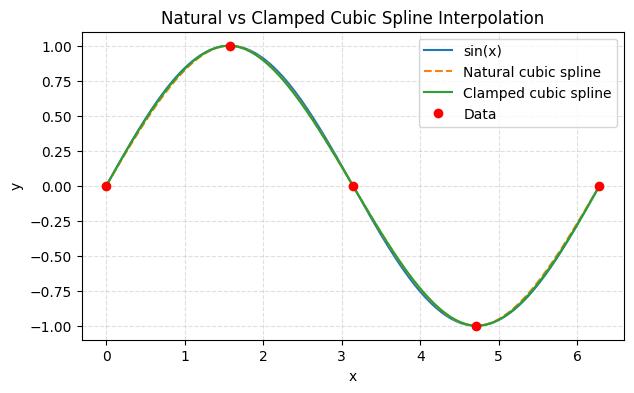

In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt
 from scipy.interpolate import CubicSpline

 f = lambda x: np.sin(x)
 xaxis = np.linspace(0, 2*np.pi, 600)
 funct = f(xaxis)
 xi = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
 yi = f(xi)
 natural_cs = CubicSpline(xi, yi, bc_type='natural')
 naturalspline = natural_cs(xaxis)
 clamped_cs = CubicSpline(xi, yi, bc_type=((1, 1), (1, 1)))
 clampedspline = clamped_cs(xaxis)

 plt.figure(figsize=(7, 4))
 plt.plot(xaxis, funct, label='sin(x)')
 plt.plot(xaxis, naturalspline, linestyle='--', label='Natural cubic spline')
 plt.plot(xaxis, clampedspline, label='Clamped cubic spline')
 plt.plot(xi, yi, 'o', label='Data', color='red')
 plt.legend(loc='upper right')
 plt.xlabel('x')
 plt.ylabel('y')
 plt.title('Natural vs Clamped Cubic Spline Interpolation')
 plt.grid(True, linestyle='--', alpha=0.4)
 plt.show()


**Piecewise Polynomials: Spline Interpolation**

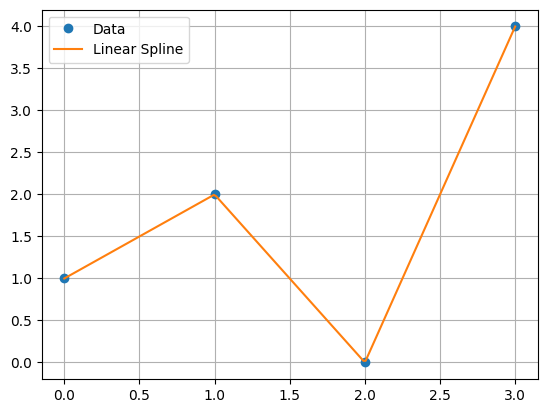

In [ ]:
## LINEAR SPLINE
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# data example
x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 0, 4])

linear_spline = interp1d(x, y, kind='linear')

xx = np.linspace(0, 3, 200)
plt.plot(x, y, 'o', label='Data')
plt.plot(xx, linear_spline(xx), label='Linear Spline')
plt.legend()
plt.grid(True)
plt.show()

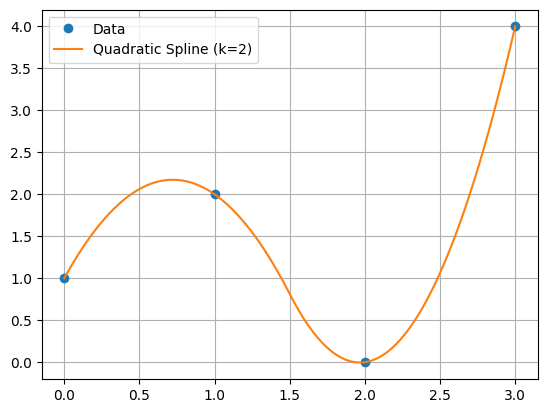

In [ ]:
## QUADRATIC SPLINE
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline

# data example
x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 0, 4])

quad_spline = InterpolatedUnivariateSpline(x, y, k=2) #k=2 because it is a polynomial of degree 2

xx = np.linspace(0, 3, 200)
plt.plot(x, y, 'o', label='Data')
plt.plot(xx, quad_spline(xx), label='Quadratic Spline (k=2)')
plt.legend()
plt.grid(True)
plt.show()

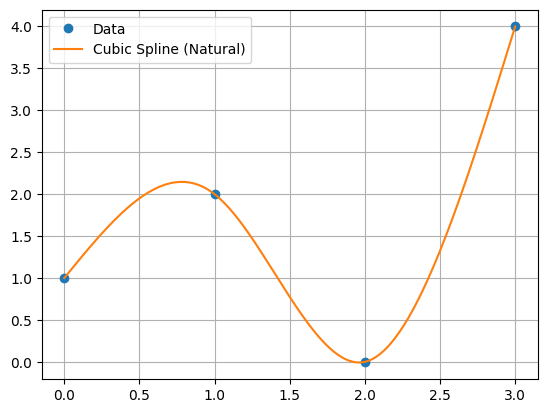

In [ ]:
## CUBIC SPLINE
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# data example
x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 0, 4])

cubic_spline = CubicSpline(x, y, bc_type='natural')

xx = np.linspace(0, 3, 200)
plt.plot(x, y, 'o', label='Data')
plt.plot(xx, cubic_spline(xx), label='Cubic Spline (Natural)')
plt.legend()
plt.grid(True)
plt.show()